In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import sys

In [4]:
sys.path.append('../')

In [5]:
import gym

In [6]:
import random
import numpy as np
import pandas as pd

In [7]:
from mdp.policyEvaluation import generate_arbitrary_policy
from mdp.policyEvaluation import synchronous_state_sweep_policy_evaluation
from mdp.policyEvaluation import asynchronous_inplace_policy_evaluation

In [8]:
from mdp.ValueIteration import value_iteration
from mdp.ValueIteration import synchronous_value_iteration

In [9]:
from mdp.policyIteration import improvePolicy
from mdp.policyIteration import policyIteration

In [10]:
from mdp.utils.env import make_env

In [11]:
import matplotlib.pyplot as plt 

In [12]:
seed = 0  # Random number generator seed
gamma = 0.95  # Discount factor
num_iters = 10  # Number of iterations
random.seed(seed)  # Set the random seed to ensure results can be reproduced
np.random.seed(seed)

##  Load and set-up Environment 

In [13]:
# Now set up the environment
env_info = make_env('FrozenLake-v1', seed=seed)

In [14]:
env=env_info['env']

In [15]:
env.P

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

## Policy Evaluation 

### Generate an arbitrary policy

In [16]:
policy = generate_arbitrary_policy(env)

In [17]:
policy

{0: {0: 0.2275676958864965,
  1: 0.29655610706227664,
  2: 0.2499382243253878,
  3: 0.22593797272583904},
 1: {0: 0.17660310472827,
  1: 0.2692449274061814,
  2: 0.18241091619631808,
  3: 0.37174105166923044},
 2: {0: 0.3612302752574101,
  1: 0.1437335664175093,
  2: 0.2967791899378672,
  3: 0.19825696838721354},
 3: {0: 0.34389290839676195,
  1: 0.5603541372383523,
  2: 0.043005070953708896,
  3: 0.05274788341117701},
 4: {0: 0.008084102239973011,
  1: 0.3329138215977038,
  2: 0.31113735655710123,
  3: 0.34786471960522186},
 5: {0: 0.3240688320611365,
  1: 0.26464084246212655,
  2: 0.15281859279728796,
  3: 0.258471732679449},
 6: {0: 0.06406309990748013,
  1: 0.34661190718973506,
  2: 0.07764701376380721,
  3: 0.5116779791389775},
 7: {0: 0.2641869271128106,
  1: 0.20992357194778705,
  2: 0.13393189419097806,
  3: 0.3919576067484244},
 8: {0: 0.2746223369775663,
  1: 0.3422219571717576,
  2: 0.011312276990131154,
  3: 0.371843428860545},
 9: {0: 0.21442448354447244,
  1: 0.2161193890

### State sweep policy evaluation

In [18]:
sv,number_iterations=synchronous_state_sweep_policy_evaluation(env, policy, gamma = 0.9, theta=1e-10)

In [19]:
sv,number_iterations

({0: 0.0010423898017230234,
  1: 0.0020549338263810986,
  2: 0.007320106374633377,
  3: 0.002479255851789554,
  4: 0.0005795690927488232,
  5: 0.0,
  6: 0.0362065295086028,
  7: 0.0,
  8: 0.0008310552007990424,
  9: 0.042401667963629194,
  10: 0.10525876135613825,
  11: 0.0,
  12: 0.0,
  13: 0.056152099954077044,
  14: 0.37610265825488004,
  15: 0.0},
 55)

### In place policy evaluation 

In [20]:
asv,number_iterations = asynchronous_inplace_policy_evaluation(env, policy, gamma = 0.9, theta = 1e-10)

In [21]:
asv,number_iterations

({0: 0.0010423898810311546,
  1: 0.0020549338993577086,
  2: 0.007320106464126542,
  3: 0.002479255900199326,
  4: 0.0005795691629630125,
  5: 0.0,
  6: 0.0362065295779014,
  7: 0.0,
  8: 0.0008310552577103811,
  9: 0.04240166798719282,
  10: 0.10525876136917989,
  11: 0.0,
  12: 0.0,
  13: 0.05615209995908131,
  14: 0.37610265826129125,
  15: 0.0},
 42)

In [22]:
sv, asv

({0: 0.0010423898017230234,
  1: 0.0020549338263810986,
  2: 0.007320106374633377,
  3: 0.002479255851789554,
  4: 0.0005795690927488232,
  5: 0.0,
  6: 0.0362065295086028,
  7: 0.0,
  8: 0.0008310552007990424,
  9: 0.042401667963629194,
  10: 0.10525876135613825,
  11: 0.0,
  12: 0.0,
  13: 0.056152099954077044,
  14: 0.37610265825488004,
  15: 0.0},
 {0: 0.0010423898810311546,
  1: 0.0020549338993577086,
  2: 0.007320106464126542,
  3: 0.002479255900199326,
  4: 0.0005795691629630125,
  5: 0.0,
  6: 0.0362065295779014,
  7: 0.0,
  8: 0.0008310552577103811,
  9: 0.04240166798719282,
  10: 0.10525876136917989,
  11: 0.0,
  12: 0.0,
  13: 0.05615209995908131,
  14: 0.37610265826129125,
  15: 0.0})

In [23]:
N = 1000
s_number_iterations_batch = []
as_number_iterations_batch = []
for _ in range(N):
    policy = generate_arbitrary_policy(env)
    sv,s_number_iterations=synchronous_state_sweep_policy_evaluation(env, policy, gamma = 0.9, theta=1e-10)
    asv,as_number_iterations = asynchronous_inplace_policy_evaluation(env, policy, gamma = 0.9, theta = 1e-10)
    
    s_number_iterations_batch.append(s_number_iterations)
    as_number_iterations_batch.append(as_number_iterations)
    
    
    


In [24]:
pd.Series(as_number_iterations_batch).mean()/pd.Series(s_number_iterations_batch).mean() -1

-0.20799159688048585

## Policy Iteration

### Synchronous 

In [32]:
currentPolicy = policyIteration(env, 
                    discountRate =0.9,
                   stateNumber =16,
                   actionNumber =4,
                   maxNumberOfIterationsOfPolicyIteration =1000,
                    maxNumberOfIterationsOfIterativePolicyEvaluation =1000,
                    convergenceToleranceIterativePolicyEvaluation =10e-10
                   )

Iteration - 0 - of policy iteration algorithm
Iteration - 1 - of policy iteration algorithm
Policy iteration algorithm converged!


In [33]:
currentPolicy

{0: {0: 0, 1: 1, 2: 0, 3: 0},
 1: {0: 0, 1: 0, 2: 1, 3: 0},
 2: {0: 0, 1: 1, 2: 0, 3: 0},
 3: {0: 1, 1: 0, 2: 0, 3: 0},
 4: {0: 0, 1: 1, 2: 0, 3: 0},
 5: {0: 1, 1: 0, 2: 0, 3: 0},
 6: {0: 0, 1: 1, 2: 0, 3: 0},
 7: {0: 1, 1: 0, 2: 0, 3: 0},
 8: {0: 0, 1: 0, 2: 1, 3: 0},
 9: {0: 0, 1: 1, 2: 0, 3: 0},
 10: {0: 0, 1: 1, 2: 0, 3: 0},
 11: {0: 1, 1: 0, 2: 0, 3: 0},
 12: {0: 1, 1: 0, 2: 0, 3: 0},
 13: {0: 0, 1: 0, 2: 1, 3: 0},
 14: {0: 0, 1: 0, 2: 1, 3: 0},
 15: {0: 1, 1: 0, 2: 0, 3: 0}}

### Asynchronous 

In [34]:
async_currentPolicy = policyIteration(env, 
                    discountRate =0.9,
                   stateNumber =16,
                   actionNumber =4,
                   maxNumberOfIterationsOfPolicyIteration =1000,
                    maxNumberOfIterationsOfIterativePolicyEvaluation =1000,
                    convergenceToleranceIterativePolicyEvaluation =10e-10,
                                      synchronous_evaluation = False
                   )

Iteration - 0 - of policy iteration algorithm
Iteration - 1 - of policy iteration algorithm
Policy iteration algorithm converged!


In [35]:
async_currentPolicy

{0: {0: 0, 1: 1, 2: 0, 3: 0},
 1: {0: 0, 1: 0, 2: 1, 3: 0},
 2: {0: 0, 1: 1, 2: 0, 3: 0},
 3: {0: 1, 1: 0, 2: 0, 3: 0},
 4: {0: 0, 1: 1, 2: 0, 3: 0},
 5: {0: 1, 1: 0, 2: 0, 3: 0},
 6: {0: 0, 1: 1, 2: 0, 3: 0},
 7: {0: 1, 1: 0, 2: 0, 3: 0},
 8: {0: 0, 1: 0, 2: 1, 3: 0},
 9: {0: 0, 1: 1, 2: 0, 3: 0},
 10: {0: 0, 1: 1, 2: 0, 3: 0},
 11: {0: 1, 1: 0, 2: 0, 3: 0},
 12: {0: 1, 1: 0, 2: 0, 3: 0},
 13: {0: 0, 1: 0, 2: 1, 3: 0},
 14: {0: 0, 1: 0, 2: 1, 3: 0},
 15: {0: 1, 1: 0, 2: 0, 3: 0}}

## Value Iteration

### Synchronous

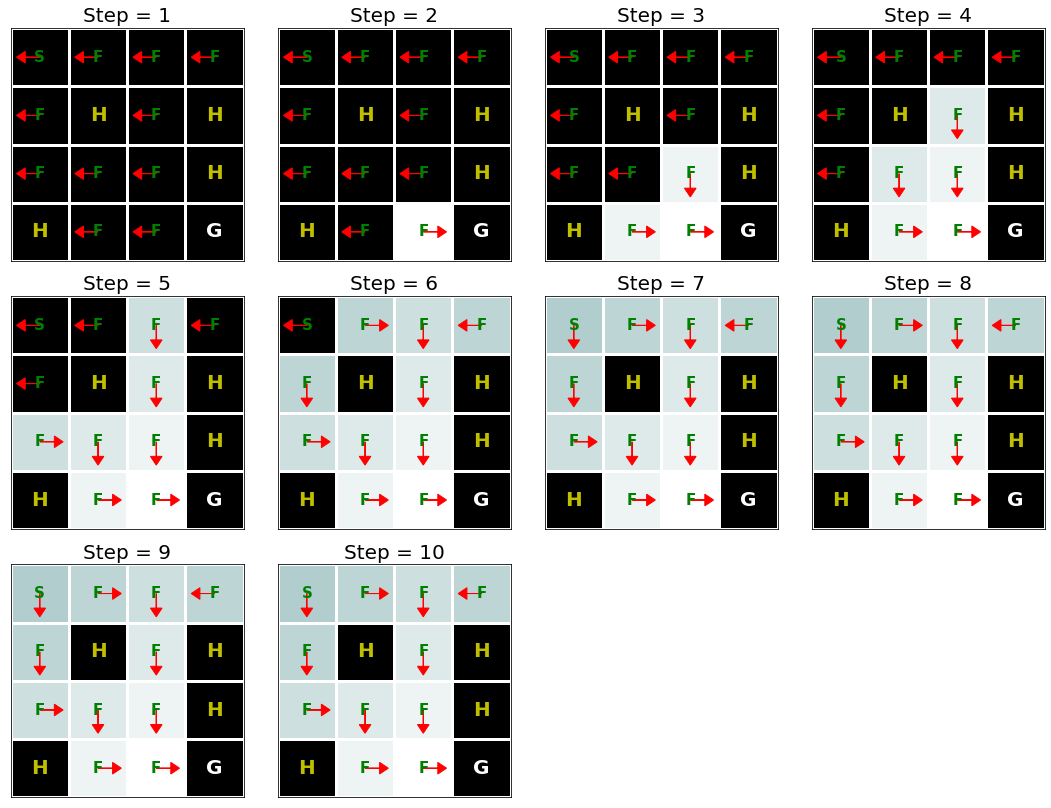

In [36]:
sV, spi =  synchronous_value_iteration(env_info=env_info, gamma=gamma, num_iters=num_iters)

In [41]:
spi.shape

(11, 16)

In [39]:
spi[-1:]

array([[1., 2., 1., 0., 1., 0., 1., 0., 2., 1., 1., 0., 0., 2., 2., 0.]])

In [43]:
for s in range(16):
    q=[]
    for a in range(4):
        q.append(async_currentPolicy[s][a])
    print(np.argmax(q))


1
2
1
0
1
0
1
0
2
1
1
0
0
2
2
0


### Asynchronous

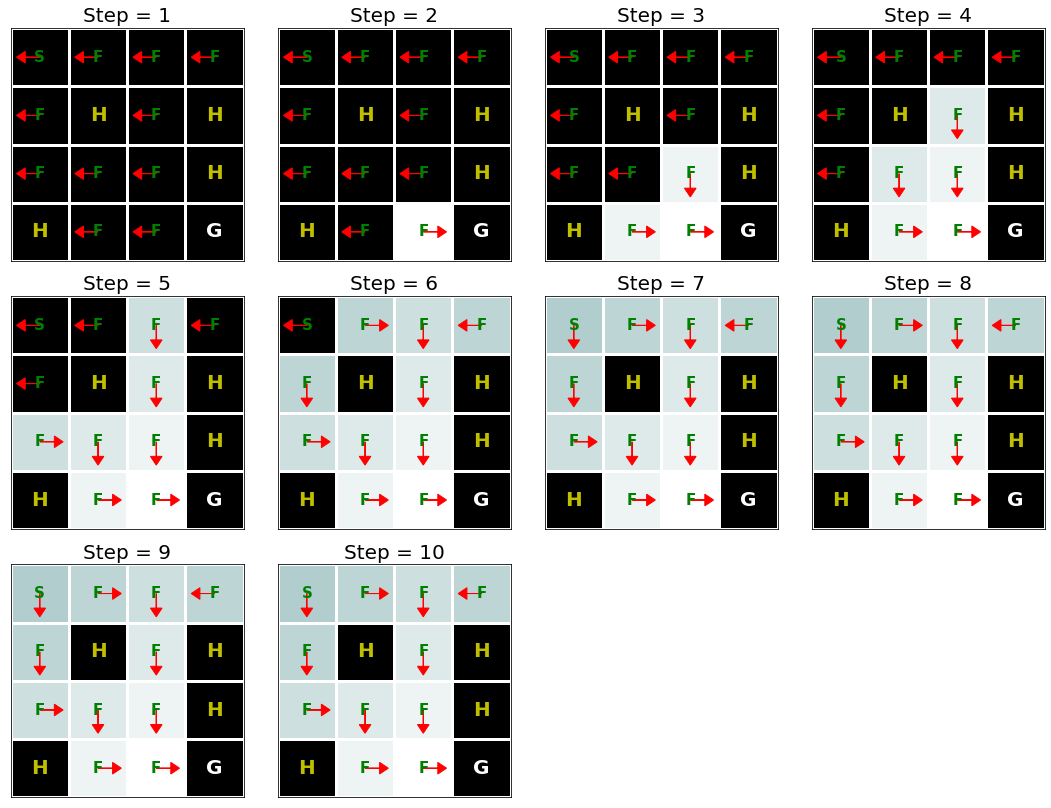

In [37]:
asV, aspi = value_iteration(env_info=env_info, gamma=gamma, num_iters=num_iters)

In [ ]:
asV.shape

In [ ]:
aspi[10,:]

In [ ]:
asV[:-1], aspi[:-1]

In [ ]:
sV

In [ ]:
asV

In [ ]:
spi, aspi